# 0. Khai báo các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from scipy import stats

# 1. Đọc file dữ liệu EXCEL

In [2]:
df = pd.read_excel("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2022/01/08185826/house_price_do%CC%82%CC%81ng-da.xlsx")
df.head()

C:\Users\PHAM THE ANH\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",35.0,12500.0,2021-02-19,Sổ đỏ,NaN,NaN,NaN,NaN,6.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008930,105.824105
2,Bán nhà số 36 Đoàn Kết - phố Khâm Thiên - Đống...,"Số 36 Đoàn Kết, Phố Khâm Thiên, Phường Thổ Qu...",57.0,4200.0,2021-03-10,Sổ đỏ,Nam,Nam,3.0,8.0,4.0,Bán nhà riêng\n,Phố Khâm Thiên,Phường Khâm Thiên,Quận Đống Đa,Thành phố Hà Nội,21.025208,105.833111
3,Bán nhà 6 tầng mới kinh doanh mặt ngõ 1194 Đườ...,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",62.0,11000.0,2021-03-13,Sổ đỏ,Đông,Đông-Nam,6.0,5.0,6.0,Bán nhà riêng\n,Đường Láng Thượng,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.025379,105.801011
4,"Bán nhà mặt phố Thái Hà 70m2, 5 tầng, 4.5m mặt...","Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",70.0,36000.0,2021-03-13,Sổ đỏ,NaN,NaN,NaN,6.0,5.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1000 non-null   object        
 1   address            1000 non-null   object        
 2   area               994 non-null    float64       
 3   price              944 non-null    float64       
 4   postDate           1000 non-null   datetime64[ns]
 5   land_certificate   693 non-null    object        
 6   house_direction    44 non-null     object        
 7   balcony_direction  24 non-null     object        
 8   toilet             551 non-null    float64       
 9   bedroom            635 non-null    float64       
 10  floor              376 non-null    float64       
 11  type_of_land       1000 non-null   object        
 12  street_name        808 non-null    object        
 13  ward_name          802 non-null    object        
 14  district_

# 2. Xử lý giá trị khuyết thiếu và giá trị ngoại lai

2.1. Xử lý giá trị khuyết thiếu

In [4]:
# Lọc các dữ liệu cần thiết của cột "area", "price", "bedroom", "toilet", "type_of_land"
df1 = df.loc[:, ["area", "price", "bedroom", "toilet", "type_of_land"]]
df.head()

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",35.0,12500.0,2021-02-19,Sổ đỏ,NaN,NaN,NaN,NaN,6.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008930,105.824105
2,Bán nhà số 36 Đoàn Kết - phố Khâm Thiên - Đống...,"Số 36 Đoàn Kết, Phố Khâm Thiên, Phường Thổ Qu...",57.0,4200.0,2021-03-10,Sổ đỏ,Nam,Nam,3.0,8.0,4.0,Bán nhà riêng\n,Phố Khâm Thiên,Phường Khâm Thiên,Quận Đống Đa,Thành phố Hà Nội,21.025208,105.833111
3,Bán nhà 6 tầng mới kinh doanh mặt ngõ 1194 Đườ...,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",62.0,11000.0,2021-03-13,Sổ đỏ,Đông,Đông-Nam,6.0,5.0,6.0,Bán nhà riêng\n,Đường Láng Thượng,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.025379,105.801011
4,"Bán nhà mặt phố Thái Hà 70m2, 5 tầng, 4.5m mặt...","Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",70.0,36000.0,2021-03-13,Sổ đỏ,NaN,NaN,NaN,6.0,5.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          994 non-null    float64
 1   price         944 non-null    float64
 2   bedroom       635 non-null    float64
 3   toilet        551 non-null    float64
 4   type_of_land  1000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [6]:
# Xoá các dòng dữ liệu không có dữ liệu area và price
df1.dropna(subset = ["area", "price"], inplace = True)

In [7]:
# Thay thế giá trị khuyết thiếu bằng giá trị nội suy theo các cột
df1 = df1.interpolate(method = "linear", axis = 0).ffill().bfill()
df1 = df1.round(0)

In [8]:
df1["type_of_land"].replace('Bán nhà riêng\n ', 'Bán nhà riêng', inplace = True)
df1["type_of_land"].replace('Bán nhà mặt phố\n ', 'Bán nhà mặt phố', inplace = True)
df1["type_of_land"].replace('Bất động sản khác\n ', 'Bất động sản khác', inplace = True)
df1["type_of_land"].unique()

array(['Bán nhà riêng', 'Bán nhà mặt phố', 'Tập thể, cư xá', 'Chung cư',
       'Bất động sản khác', 'Đất thổ cư'], dtype=object)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          942 non-null    float64
 1   price         942 non-null    float64
 2   bedroom       942 non-null    float64
 3   toilet        942 non-null    float64
 4   type_of_land  942 non-null    object 
dtypes: float64(4), object(1)
memory usage: 44.2+ KB


2.2. Xử lý giá trị ngoại lai theo phương pháp Z-Score

In [10]:
# Xoá các dòng có dữ liệu area bằng 0
df1 = df1[df1.area > 0]
df1.reset_index(drop=True, inplace=True)

In [11]:
z = np.abs(stats.zscore(df1.area))

In [12]:
threshold = 1.0
index = np.where((z > 2 * z.min()) & (z < threshold))

In [13]:
df2 = df1.loc[index[0], :]

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 912 entries, 0 to 925
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          912 non-null    float64
 1   price         912 non-null    float64
 2   bedroom       912 non-null    float64
 3   toilet        912 non-null    float64
 4   type_of_land  912 non-null    object 
dtypes: float64(4), object(1)
memory usage: 42.8+ KB


In [15]:
df2.area.min()

6.0

# 3. Vẽ biểu đồ phân tích mối liên hệ giữa diện tích với giá nhà, giữa số phòng ngủ với giá nhà, giữa số toilet với giá nhà.

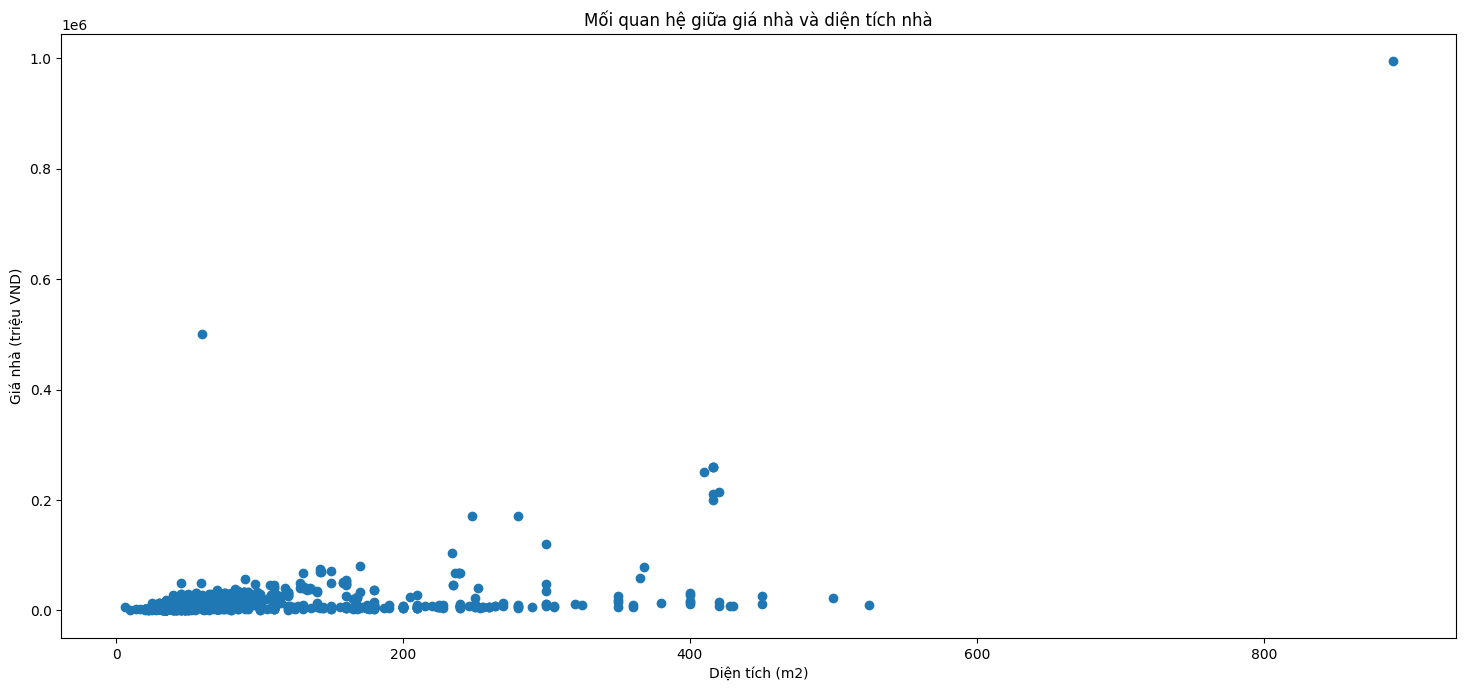

In [16]:
# Vẽ biểu đồ phân tích mối liên hệ giữa diện tích với giá nhà
x = df2.area
y = df2.price
plt.figure(figsize = (18, 8), dpi = 100)
plt.scatter(x, y)
plt.title("Mối quan hệ giữa giá nhà và diện tích nhà")
plt.xlabel("Diện tích (m2)")
plt.ylabel("Giá nhà (triệu VND)")
plt.show()

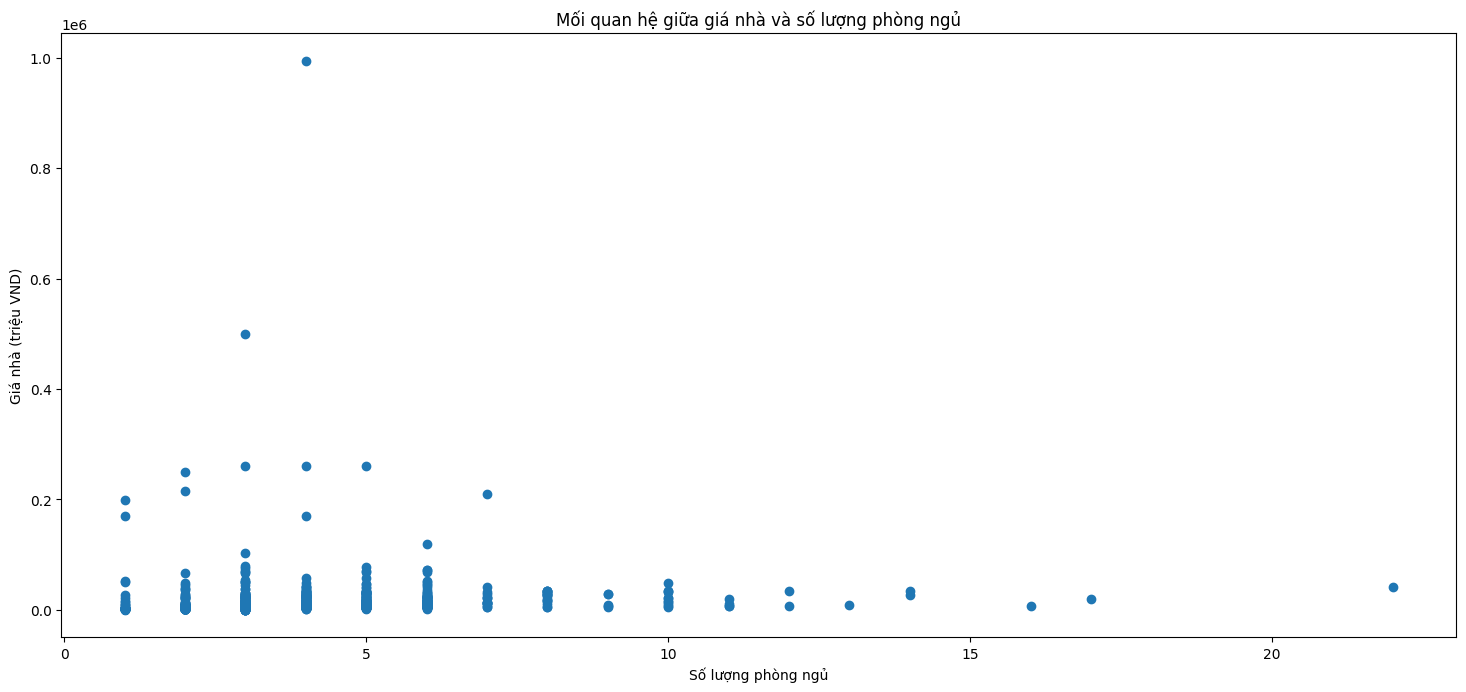

In [17]:
# Vẽ biểu đồ phân tích mối liên hệ giữa số lượng phòng ngủ với giá nhà
x = df2.bedroom
y = df2.price
plt.figure(figsize = (18, 8), dpi = 100)
plt.scatter(x, y)
plt.title("Mối quan hệ giữa giá nhà và số lượng phòng ngủ")
plt.xlabel("Số lượng phòng ngủ")
plt.ylabel("Giá nhà (triệu VND)")
plt.show()

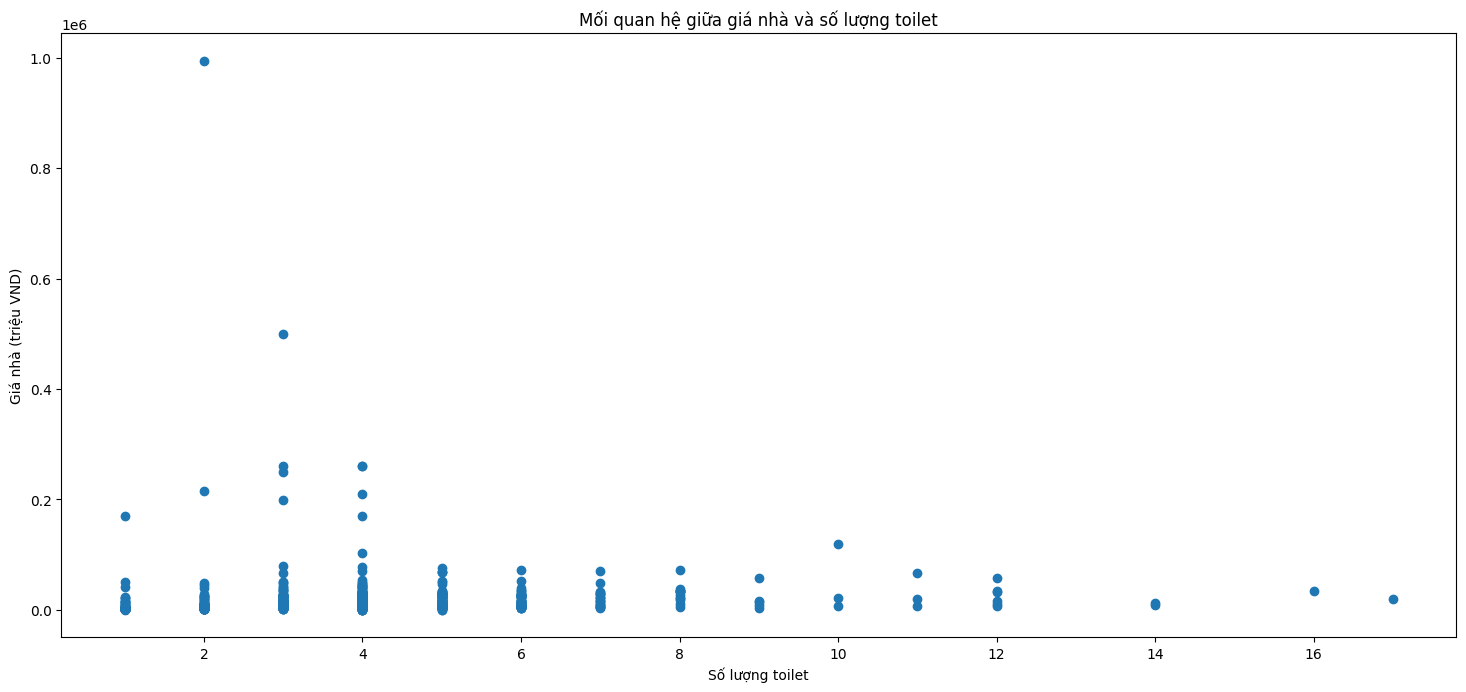

In [18]:
# Vẽ biểu đồ phân tích mối liên hệ giữa số lượng toilet với giá nhà
x = df2.toilet
y = df2.price
plt.figure(figsize = (18, 8), dpi = 100)
plt.scatter(x, y)
plt.title("Mối quan hệ giữa giá nhà và số lượng toilet")
plt.xlabel("Số lượng toilet")
plt.ylabel("Giá nhà (triệu VND)")
plt.show()

# 4. Vẽ biểu đồ so sánh giá nhà trung bình trên 1 m2 giữa các hình thức nhà (type_of_land)

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 912 entries, 0 to 925
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          912 non-null    float64
 1   price         912 non-null    float64
 2   bedroom       912 non-null    float64
 3   toilet        912 non-null    float64
 4   type_of_land  912 non-null    object 
dtypes: float64(4), object(1)
memory usage: 42.8+ KB


In [20]:
df2["UnitPrice"] = df2.price / df2.area

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 912 entries, 0 to 925
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          912 non-null    float64
 1   price         912 non-null    float64
 2   bedroom       912 non-null    float64
 3   toilet        912 non-null    float64
 4   type_of_land  912 non-null    object 
 5   UnitPrice     912 non-null    float64
dtypes: float64(5), object(1)
memory usage: 49.9+ KB


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 912 entries, 0 to 925
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          912 non-null    float64
 1   price         912 non-null    float64
 2   bedroom       912 non-null    float64
 3   toilet        912 non-null    float64
 4   type_of_land  912 non-null    object 
 5   UnitPrice     912 non-null    float64
dtypes: float64(5), object(1)
memory usage: 49.9+ KB


In [23]:
df3 = df2.groupby(df2.type_of_land).mean()

In [24]:
df3

,area,price,bedroom,toilet,UnitPrice
type_of_land,,,,,
Bán nhà mặt phố,110.333333,41057.587963,4.550926,4.541667,356.538095
Bán nhà riêng,101.412523,8275.114180,3.998158,4.027624,120.288530
Bất động sản khác,137.611111,22265.000000,4.500000,4.333333,209.912825
Chung cư,61.655172,1950.000000,1.827586,1.431034,26.623608
"Tập thể, cư xá",66.101449,2094.637681,2.043478,1.420290,33.353309
Đất thổ cư,80.750000,10585.000000,4.125000,3.625000,133.153612


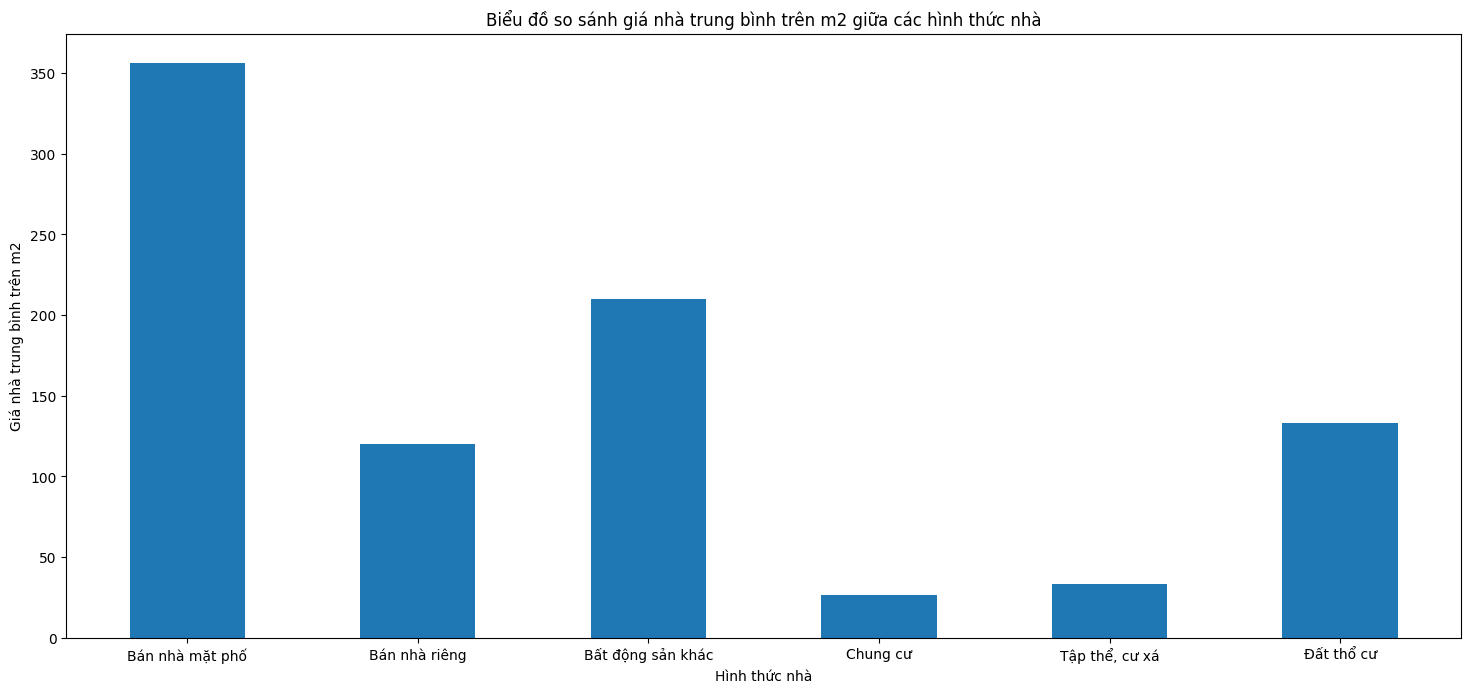

In [25]:
plt.figure(figsize = (18,8), dpi = 100)
plt.bar(df3.index.get_level_values(0), df3.UnitPrice, width = 0.5)
plt.title("Biểu đồ so sánh giá nhà trung bình trên m2 giữa các hình thức nhà")
plt.xlabel("Hình thức nhà")
plt.ylabel("Giá nhà trung bình trên m2")
plt.show()

# 5. Vẽ biểu đồ thể hiện tỉ lệ % bài đăng (bản ghi) giữa các hình thức nhà (type_of_land)

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 912 entries, 0 to 925
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          912 non-null    float64
 1   price         912 non-null    float64
 2   bedroom       912 non-null    float64
 3   toilet        912 non-null    float64
 4   type_of_land  912 non-null    object 
 5   UnitPrice     912 non-null    float64
dtypes: float64(5), object(1)
memory usage: 49.9+ KB


In [27]:
df4 = df2.groupby(df2.type_of_land).count()
df4

,area,price,bedroom,toilet,UnitPrice
type_of_land,,,,,
Bán nhà mặt phố,216,216,216,216,216
Bán nhà riêng,543,543,543,543,543
Bất động sản khác,18,18,18,18,18
Chung cư,58,58,58,58,58
"Tập thể, cư xá",69,69,69,69,69
Đất thổ cư,8,8,8,8,8


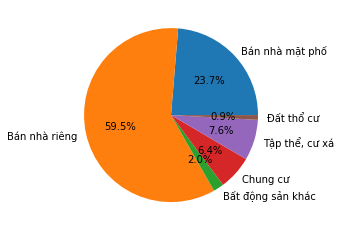

In [28]:
# Vẽ biểu đồ hình quạt
plt.pie(df4.area, labels = df4.index.get_level_values(0), autopct='%.1f%%')
plt.show()

# 6. Vẽ biểu đồ thể hiện sự thay đổi giá nhà trung bình trên 1m2 theo số lượng phòng ngủ

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 912 entries, 0 to 925
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          912 non-null    float64
 1   price         912 non-null    float64
 2   bedroom       912 non-null    float64
 3   toilet        912 non-null    float64
 4   type_of_land  912 non-null    object 
 5   UnitPrice     912 non-null    float64
dtypes: float64(5), object(1)
memory usage: 49.9+ KB


In [30]:
df6 = df2.groupby(df2.bedroom).mean()
df6

,area,price,toilet,UnitPrice
bedroom,,,,
1.0,62.862745,12535.490196,1.254902,91.977271
2.0,69.481203,9830.203008,1.894737,91.194469
3.0,82.194539,12118.358362,3.658703,169.792727
4.0,135.243902,18206.146341,4.063415,151.804414
5.0,126.433735,22115.662651,4.674699,213.149640
6.0,96.232558,18796.511628,5.058140,236.680380
7.0,118.666667,30819.333333,5.000000,239.814481
8.0,81.388889,23333.333333,5.888889,318.903669
9.0,133.600000,15620.000000,6.400000,183.317460


In [31]:
df6.reset_index(inplace = True)

In [32]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bedroom    17 non-null     float64
 1   area       17 non-null     float64
 2   price      17 non-null     float64
 3   toilet     17 non-null     float64
 4   UnitPrice  17 non-null     float64
dtypes: float64(5)
memory usage: 808.0 bytes


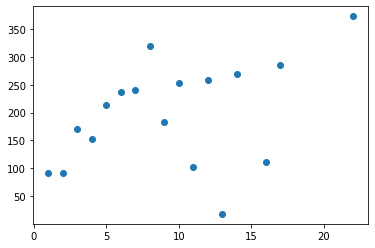

In [33]:
# Vẽ biểu đồ Scatter thể hiện sự thay đổi giá nhà trung bình trên m2 theo số lượng phòng ngủ
plt.scatter(df6.bedroom, df6.UnitPrice)
plt.show()